In [74]:
N = 15
M = 15

values = np.random.randint(3, 100, size=(N, M))
print(values)

[[64 54 38 76 37 36 10  5 29 44 63 10 57 50 52]
 [41 73 82 13 68  7 35 93  7  6 69 73 40 84 99]
 [76 98 32 54 13 50 38 51 62 63 90 51 58 17 49]
 [91 75 51 84 69 62 93 47 51 96 50  8 47 57 37]
 [88 44 73 17 78 94  9 73 18 69 89 93 86 12 29]
 [45 75 33 73 46 63 41  6 16 18 16 87 19 36 93]
 [17 90 35 20 58 27 39  3 58 88 84 86 78 31 35]
 [43 96 74 85 54 41 95 69 24 26 62 10 48  6 21]
 [60 33 32 61 35 12 74 50 64 69 48 46 25 10 60]
 [73 25 21  4 65 15 43 26  7 36 67 45 53  5 47]
 [71 21 43 15 44  4 96 14 92 61 47 38 66 21 62]
 [49 19 16 66 70 42 76 20 80 32 80 69 19 22 65]
 [40 75 51 54 81 35 27 51 98  3 29 46 30 80 17]
 [98 83 31 82 19 13 69 71 98 25 86 39 91 30 18]
 [69 28 79 93 31  4 44 62 19 87 66 96 40 29 38]]


In [75]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    unravel_idx = np.unravel_index(idx, array.shape)
    return array[unravel_idx], unravel_idx

z = 99  # для тесту
element, index = find_nearest(values, z)
print(f"Елемент: {element}, Індекс: {index}")

Елемент: 99, Індекс: (1, 14)


In [76]:
mean = np.mean(values)
median = np.median(values)
from scipy import stats
mode_result = stats.mode(values, axis=None)
mode = mode_result.mode

print(f"Середнє: {mean}, Медіана: {median}, Мода: {mode}")

Середнє: 49.61333333333334, Медіана: 48.0, Мода: 69


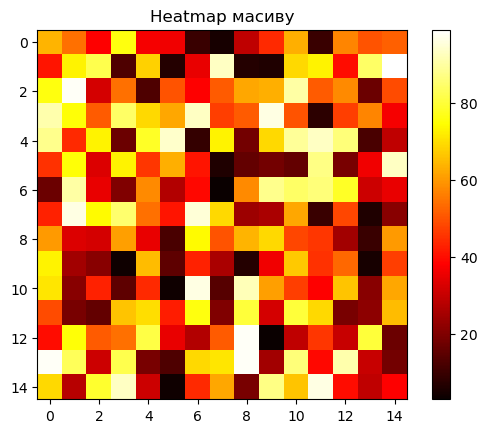

In [77]:
# Heatmap масиву
plt.imshow(values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap масиву")
plt.show()

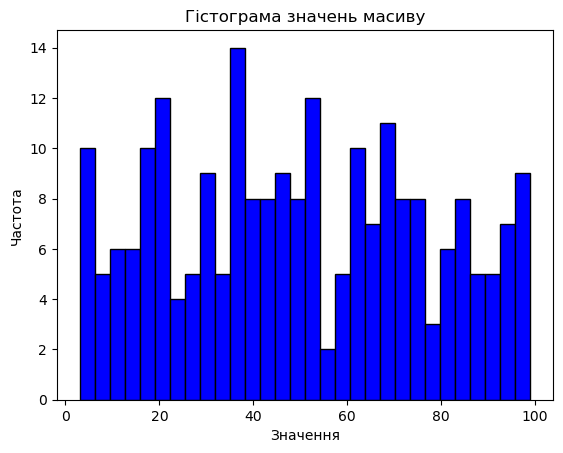

In [78]:
# Гістограма значень масиву
plt.hist(values.ravel(), bins=30, color='blue', edgecolor='black')
plt.title("Гістограма значень масиву")
plt.xlabel("Значення")
plt.ylabel("Частота")
plt.show()

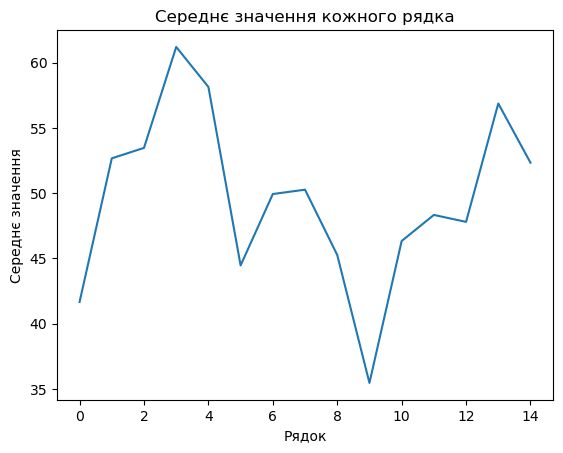

In [79]:
# Лінійний графік середнього значення кожного рядка
plt.plot(np.mean(values, axis=1))
plt.title("Середнє значення кожного рядка")
plt.xlabel("Рядок")
plt.ylabel("Середнє значення")
plt.show()

In [80]:
import numpy as np

def interpolate_missing_elements(array):
    # Дізнаємося розміри масиву
    rows, cols = array.shape
    
    # Пошук сусідів для даного елемента
    def get_neighbors(i, j):
        neighbors = []
        if i > 0 and not np.isnan(array[i-1, j]): neighbors.append(array[i-1, j])
        if i < rows-1 and not np.isnan(array[i+1, j]): neighbors.append(array[i+1, j])
        if j > 0 and not np.isnan(array[i, j-1]): neighbors.append(array[i, j-1])
        if j < cols-1 and not np.isnan(array[i, j+1]): neighbors.append(array[i, j+1])
        return neighbors
    
    # Ітеруємося по масиву та інтерполюємо елементи з значенням np.nan
    for i in range(rows):
        for j in range(cols):
            if np.isnan(array[i, j]):  # Якщо елемент відсутній
                neighbors = get_neighbors(i, j)
                if neighbors:  # Якщо є сусіди, які не є NaN
                    array[i, j] = np.mean(neighbors)

    return array

values = values.astype(float)

# Встановлення значень 10% елементів як NaN
num_elements = int(0.1 * values.size)
random_indices = np.random.choice(values.size, num_elements, replace=False)
np.put(values, random_indices, [np.nan])
print(values)
print()

# Відновлення за допомогою інтерполяції
values = interpolate_missing_elements(values)
values = values.astype(int)
print(values)


[[64. 54. nan 76. 37. 36. 10.  5. 29. 44. nan 10. 57. 50. nan]
 [41. 73. 82. nan 68.  7. 35. 93.  7.  6. 69. 73. 40. 84. 99.]
 [76. 98. 32. 54. 13. 50. 38. 51. 62. 63. 90. 51. 58. 17. 49.]
 [91. 75. 51. 84. 69. nan 93. 47. 51. 96. 50.  8. 47. 57. 37.]
 [88. 44. 73. 17. 78. 94.  9. 73. 18. 69. 89. 93. 86. 12. 29.]
 [45. 75. 33. 73. nan 63. 41.  6. nan 18. 16. 87. 19. 36. 93.]
 [17. nan 35. 20. 58. 27. 39.  3. nan 88. 84. 86. 78. 31. 35.]
 [43. nan 74. 85. 54. 41. nan 69. 24. 26. 62. 10. 48.  6. 21.]
 [60. 33. 32. 61. 35. 12. 74. 50. 64. 69. 48. 46. 25. 10. 60.]
 [73. 25. 21.  4. 65. 15. 43. 26. nan 36. 67. 45. 53.  5. 47.]
 [71. 21. 43. 15. 44.  4. 96. 14. 92. 61. 47. 38. nan 21. 62.]
 [nan 19. 16. 66. 70. 42. 76. nan 80. 32. 80. 69. nan 22. 65.]
 [40. 75. 51. 54. 81. 35. 27. nan 98.  3. 29. 46. nan 80. 17.]
 [98. 83. 31. 82. 19. nan 69. nan 98. 25. 86. 39. 91. nan 18.]
 [69. 28. 79. 93. 31.  4. 44. 62. 19. 87. 66. 96. 40. 29. nan]]

[[64 54 70 76 37 36 10  5 29 44 41 10 57 50 74]
 [41 

[[0.635 0.531 0.698 0.76  0.354 0.344 0.073 0.021 0.271 0.427 0.396 0.073
  0.562 0.49  0.74 ]
 [0.396 0.729 0.823 0.698 0.677 0.042 0.333 0.938 0.042 0.031 0.688 0.729
  0.385 0.844 1.   ]
 [0.76  0.99  0.302 0.531 0.104 0.49  0.365 0.5   0.615 0.625 0.906 0.5
  0.573 0.146 0.479]
 [0.917 0.75  0.5   0.844 0.688 0.76  0.938 0.458 0.5   0.969 0.49  0.052
  0.458 0.562 0.354]
 [0.885 0.427 0.729 0.146 0.781 0.948 0.062 0.729 0.156 0.688 0.896 0.938
  0.865 0.094 0.271]
 [0.438 0.75  0.312 0.729 0.677 0.625 0.396 0.031 0.115 0.156 0.135 0.875
  0.167 0.344 0.938]
 [0.146 0.406 0.333 0.177 0.573 0.25  0.375 0.    0.302 0.885 0.844 0.865
  0.781 0.292 0.333]
 [0.417 0.469 0.74  0.854 0.531 0.396 0.542 0.688 0.219 0.24  0.615 0.073
  0.469 0.031 0.188]
 [0.594 0.312 0.302 0.604 0.333 0.094 0.74  0.49  0.635 0.688 0.469 0.448
  0.229 0.073 0.594]
 [0.729 0.229 0.188 0.01  0.646 0.125 0.417 0.24  0.531 0.344 0.667 0.438
  0.521 0.021 0.458]
 [0.708 0.188 0.417 0.125 0.427 0.01  0.969 0.115 0.

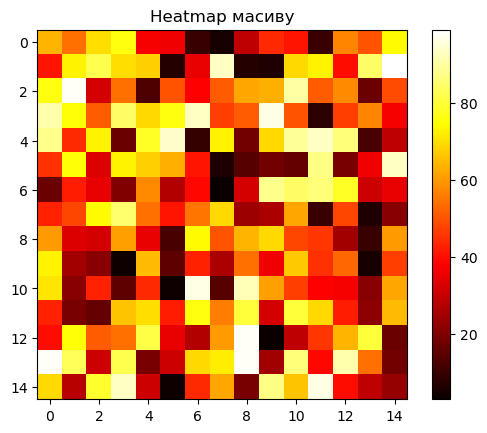

In [86]:
normalized_values = (values - np.min(values)) / (np.max(values) - np.min(values))
# rounded_array = np.round(normalized_values, 3)
print(rounded_array)

# Heatmap масиву
plt.imshow(values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap масиву")
plt.show()